# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this exercise is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the exercise focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Exercise Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [ ]:
# Importing necessary libraries

!python -m pip install matplotlib seaborn --default-timeout=200

# Core libraries
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#### **1.1.1**
Load the dataset

In [2]:
# Load the data

# Load the dataset
df = pd.read_csv("Car_Price_data.csv")

# Preview the data
df.head()


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


## **2 Analysis and Feature Engineering** 



### **2.1 Preliminary Analysis and Frequency Distributions** 

#### **2.1.1** 
Check and fix missing values.

In [3]:
# Find the proportion of missing values in each column and handle if found

# Check proportion of missing values per column
missing_ratio = df.isna().mean().sort_values(ascending=False)
missing_ratio[missing_ratio > 0]

# Handle missing values
# Numerical columns: median imputation
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns: mode imputation
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])



**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

In [4]:
target = 'price'

num_features = [
    'km',
    'age',
    'hp_kW',
    'Displacement_cc',
    'Weight_kg',
    'Gears',
    'Previous_Owners',
    'cons_comb'
]

cat_features = [
    'make_model',
    'body_type',
    'Fuel',
    'Type',
    'vat',
    'Gearing_Type',
    'Paint_Type',
    'Upholstery_type',
    'Drive_chain',
    'Inspection_new'
]


#### **2.1.2** 
Identify numerical predictors and plot their frequency distributions.

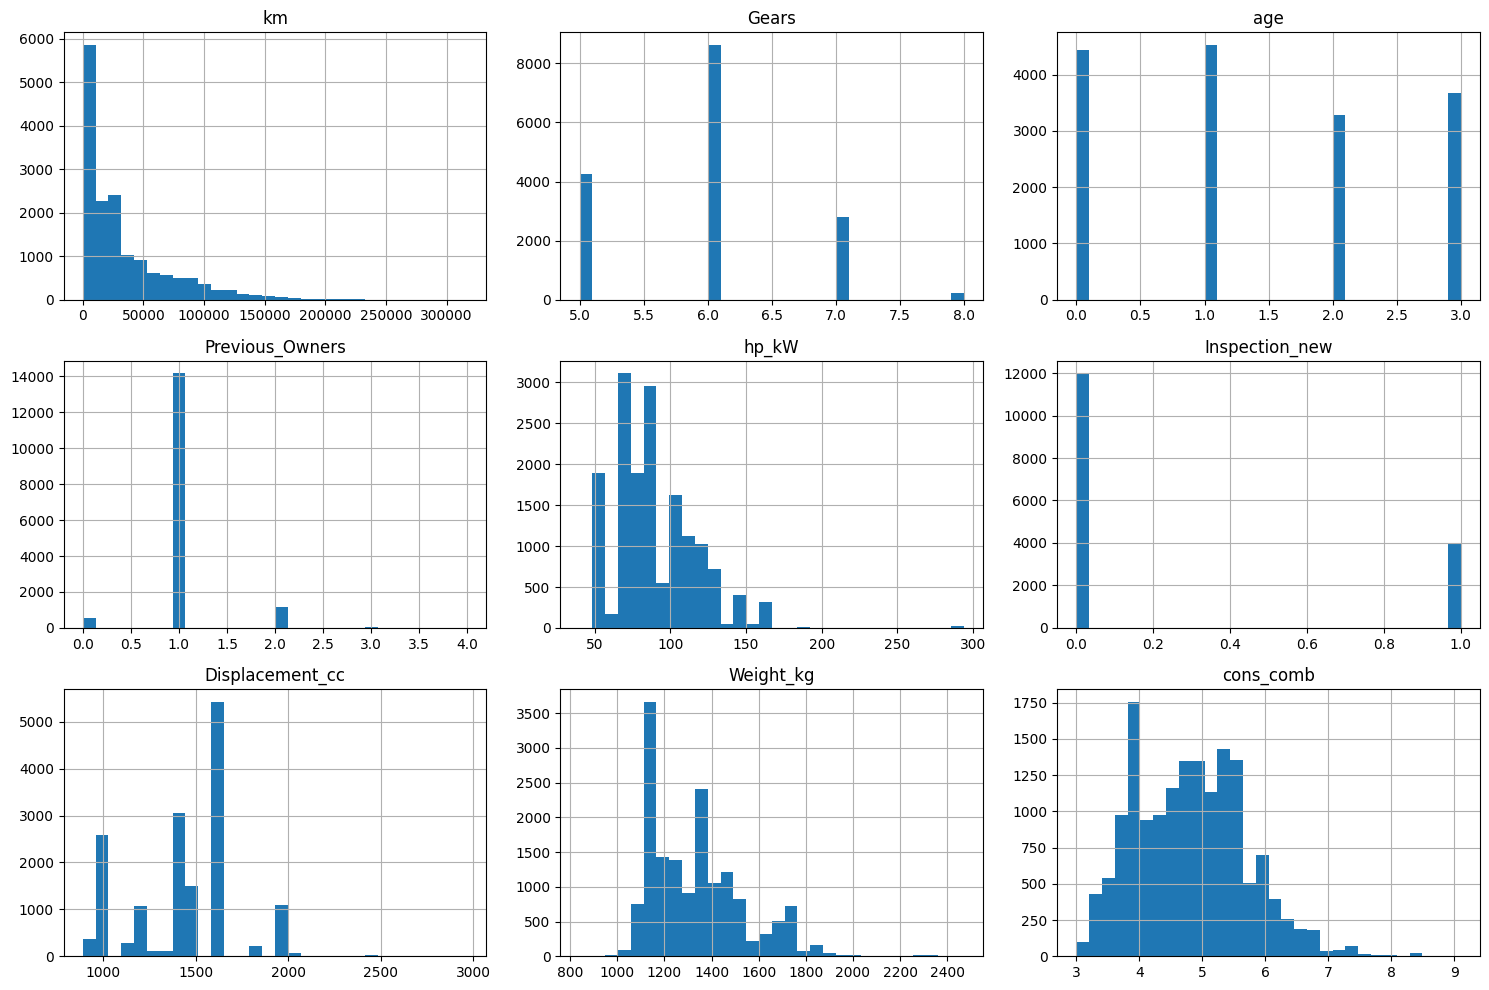

In [5]:
# Identify numerical features and plot histograms

# Identify numerical predictors
num_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')

# Plot histograms for numerical features
df[num_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


#### **2.1.3** 
Identify categorical predictors and plot their frequency distributions.

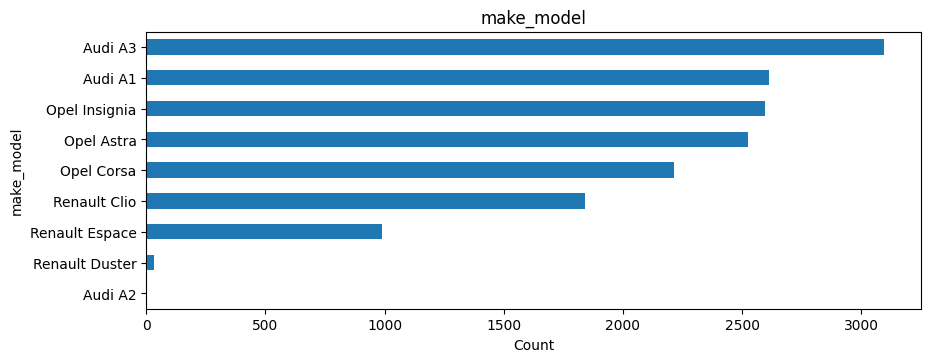

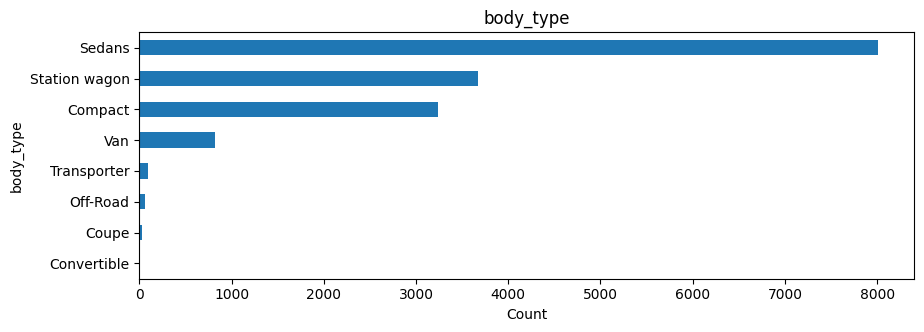

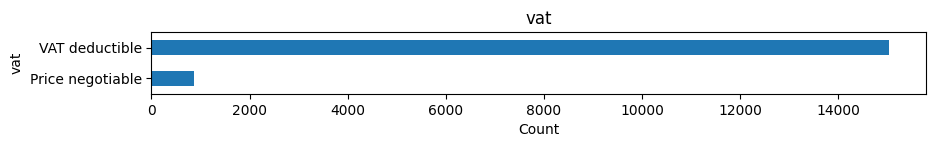

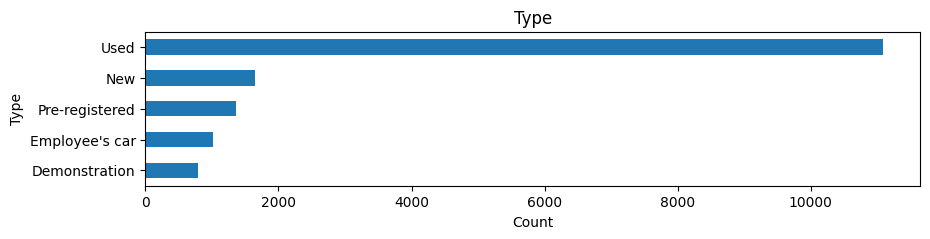

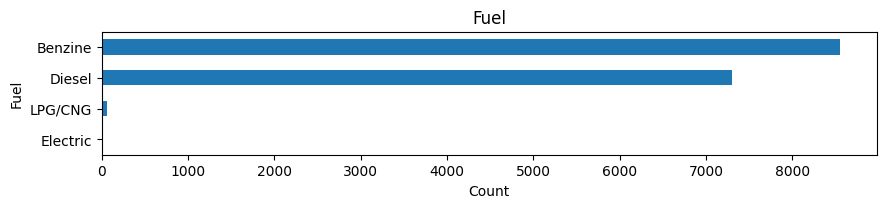

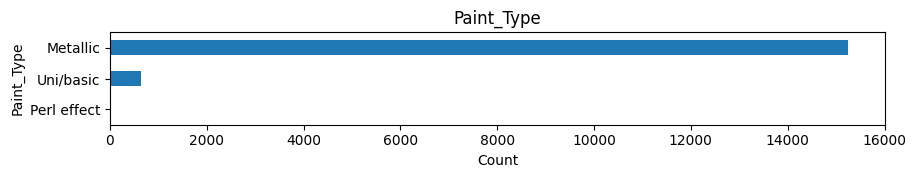

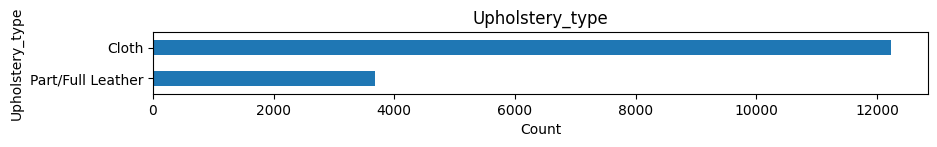

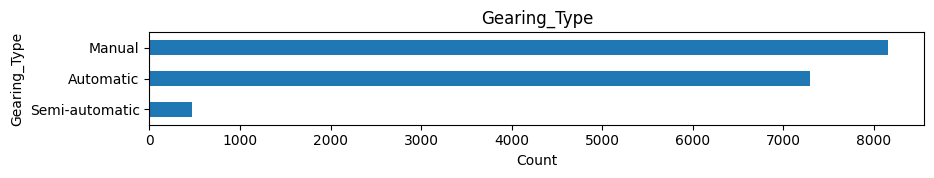

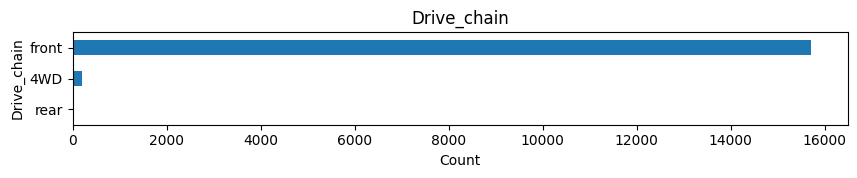

In [6]:
# Identify categorical columns and check their frequency distributions

# Identify categorical predictors
cat_features = df.select_dtypes(include=['object']).columns

# Plot frequency distributions for categorical features
# Plot categorical frequency distributions horizontally

MAX_CATEGORIES = 15  # threshold to skip large plots

for col in cat_features:
    if df[col].nunique() > MAX_CATEGORIES:
        continue  # skip large-cardinality categorical columns

    plt.figure(figsize=(10, 0.4 * df[col].nunique()))
    df[col].value_counts().sort_values().plot(kind='barh')
    plt.title(col)
    plt.xlabel("Count")
    plt.show()

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

#### <font color =red> [ANSWER] </font>
No, they should not be treated as standard categorical variables.

Although these columns are stored as text, each value represents a list of multiple features bundled together (e.g., air conditioning, parking sensors, airbags). Therefore:

A single category label does not capture the information

One-hot encoding them directly as categorical variables would be incorrect

#### **2.1.4** 
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [7]:
# Fix columns as needed

df["Type"] = df["Type"].replace(
    ["New", "Pre-registered", "Employee's car", "Demonstration"],
    "Nearly_New"
)

cat_cols = df.select_dtypes(include="object").columns.drop("Type")

threshold = 0.01 * len(df)

for col in cat_cols:
    freq = df[col].value_counts()
    rare_labels = freq[freq < threshold].index
    df[col] = df[col].replace(rare_labels, "Other")


#### **2.1.5** 
Identify target variable and plot the frequency distributions. Apply necessary transformations.

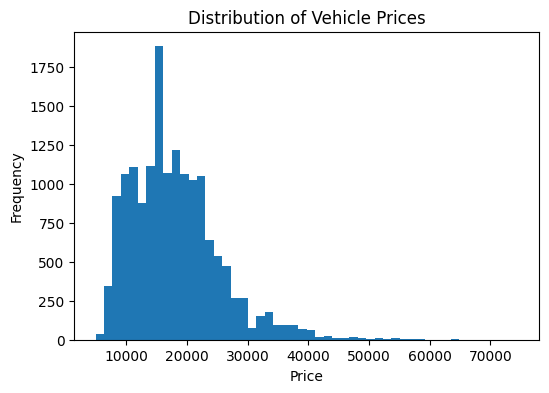

In [8]:
# Plot histograms for target feature

# Target feature: price
target = "price"

# Used car prices are typically right-skewed, so we first visualise the raw distribution.
plt.figure(figsize=(6, 4))
plt.hist(df[target], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Vehicle Prices")
plt.show()


**The target variable seems to be skewed. Perform suitable transformation on the target.**

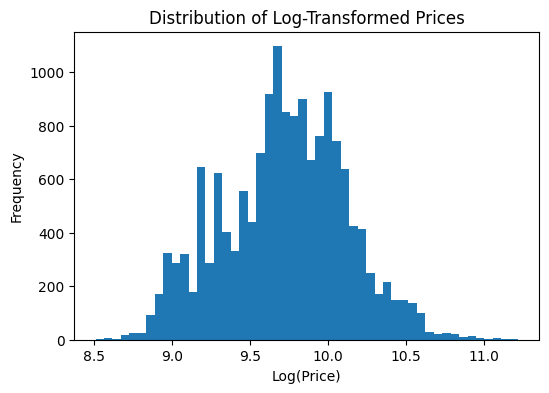

In [9]:
# Transform the target feature

# Transformation applied: log(price)
df["log_price"] = np.log1p(df[target])

plt.figure(figsize=(6, 4))
plt.hist(df["log_price"], bins=50)
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Prices")
plt.show()

### **2.2 Correlation analysis** 

#### **2.2.1** 
Plot the correlation map between features and target variable.

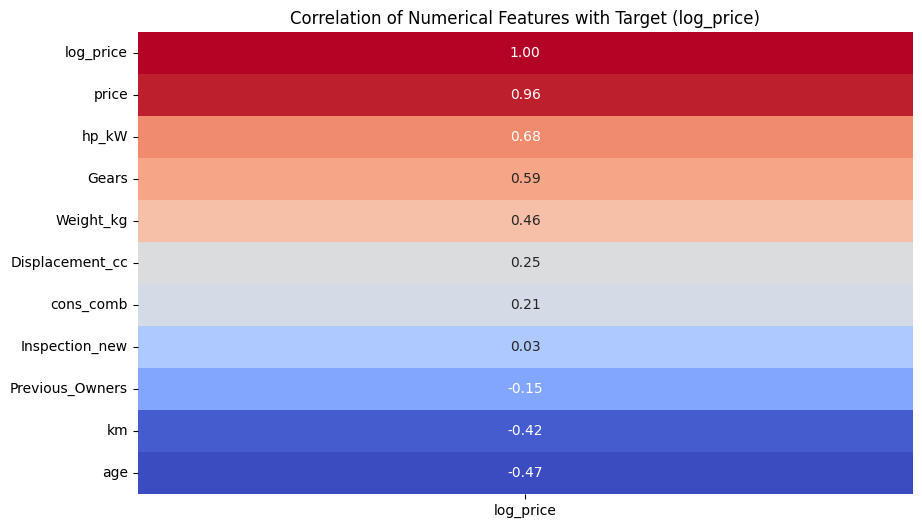

In [10]:
# Visualise correlation

# Select numerical features + target
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr_data = df[num_cols]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Visualise correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix[[ "log_price" ]].sort_values(by="log_price", ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar=False
)
plt.title("Correlation of Numerical Features with Target (log_price)")
plt.show()



#### **2.2.2** 
Analyse correlation between categorical features and target variable.

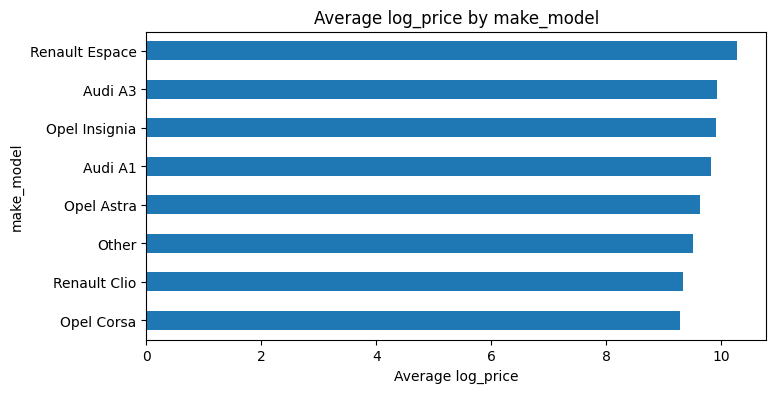

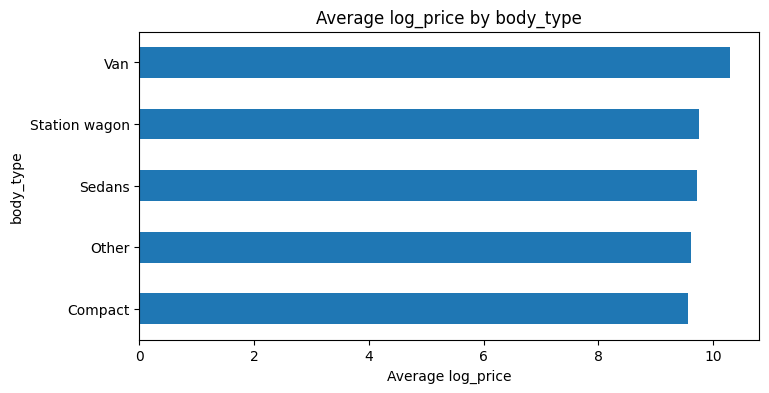

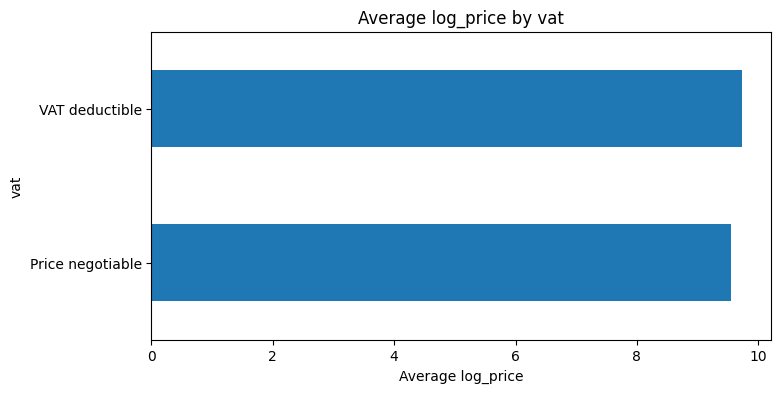

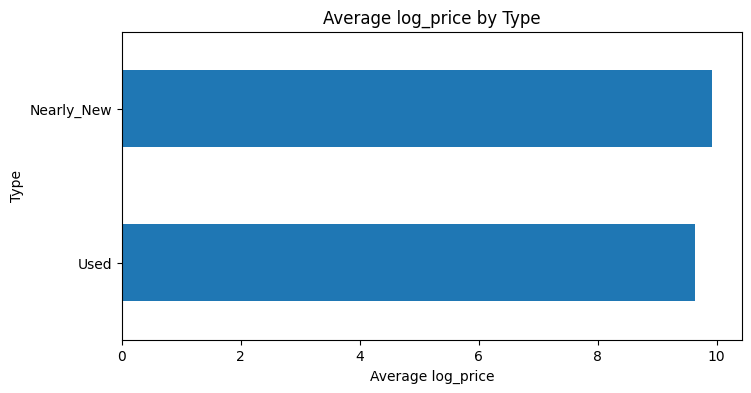

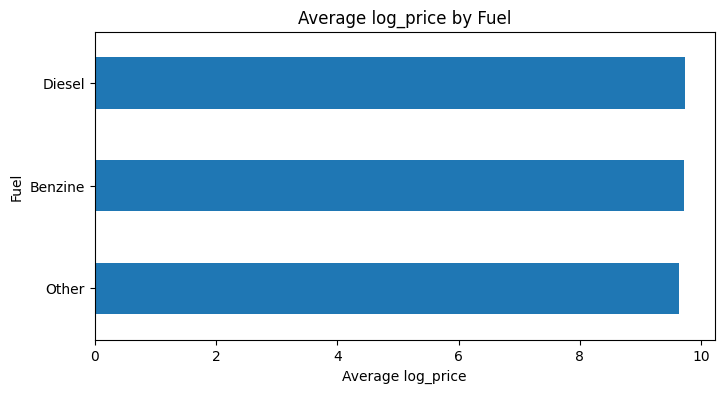

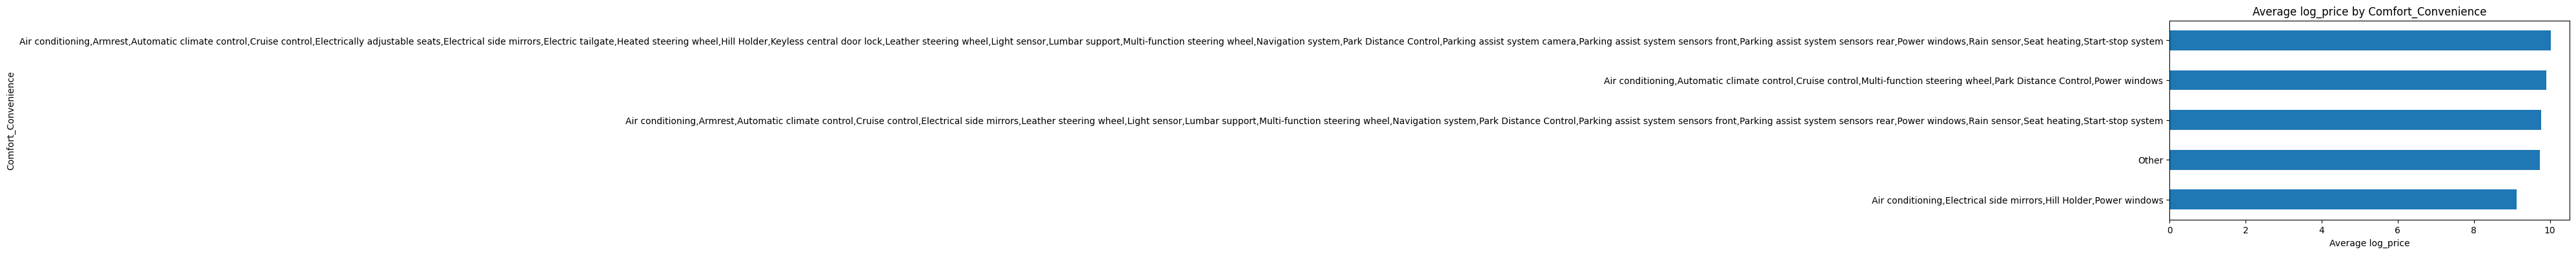

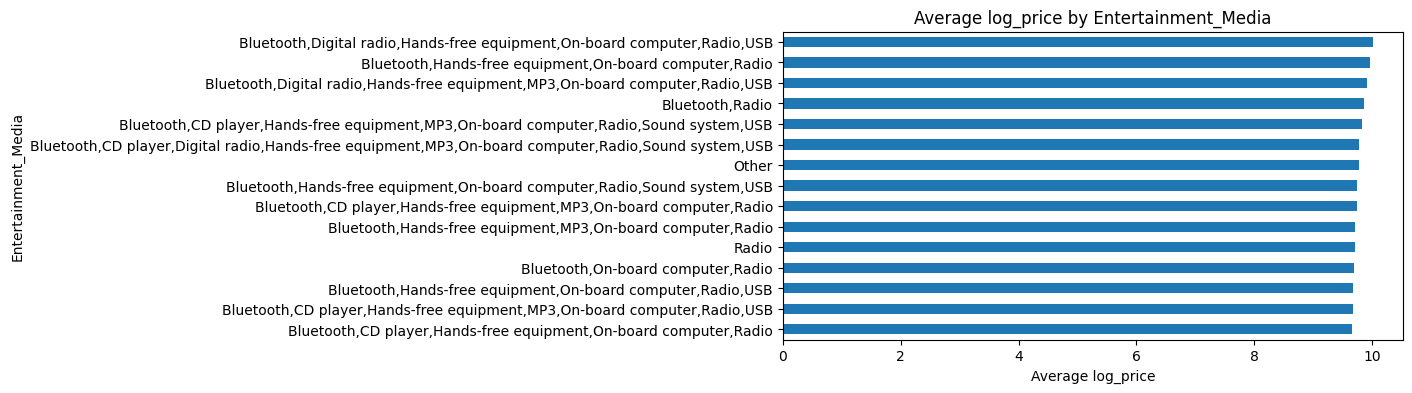

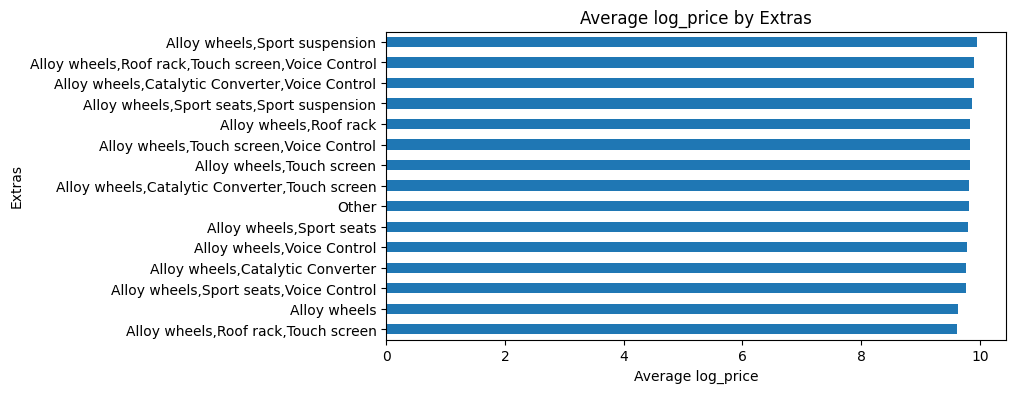

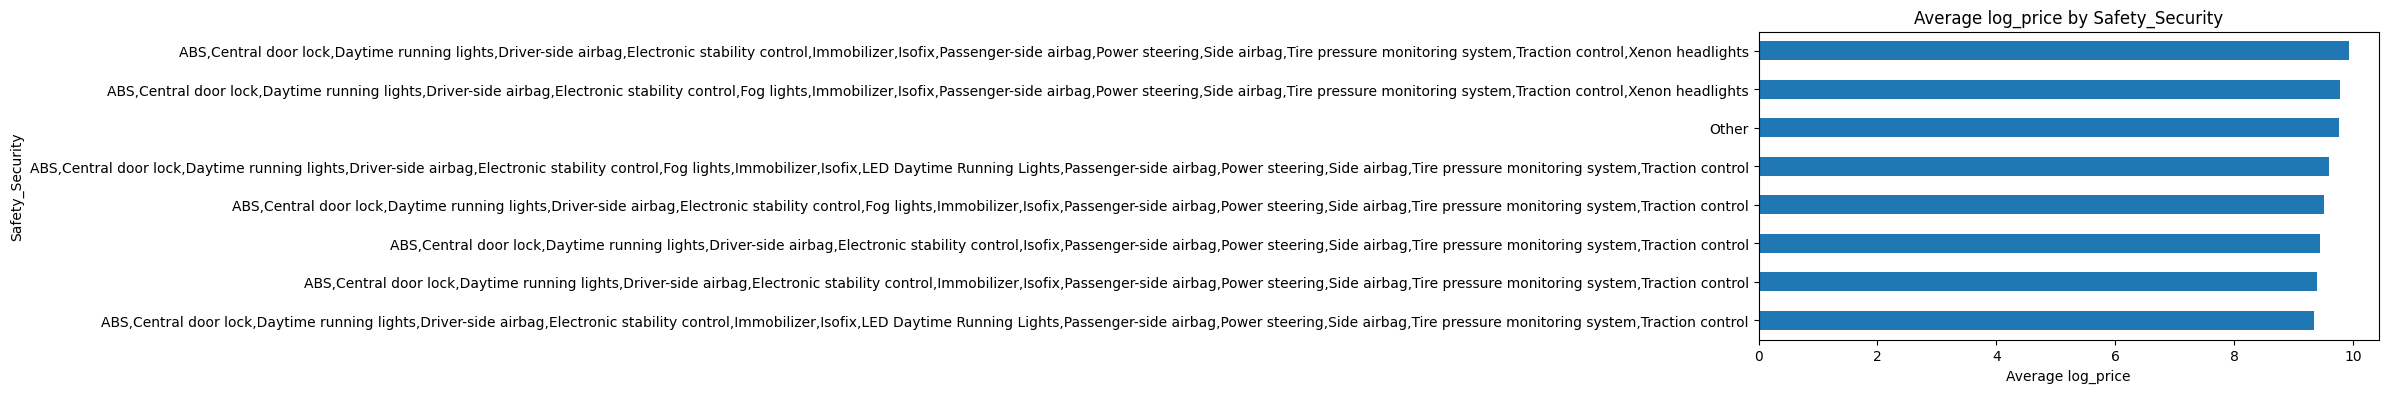

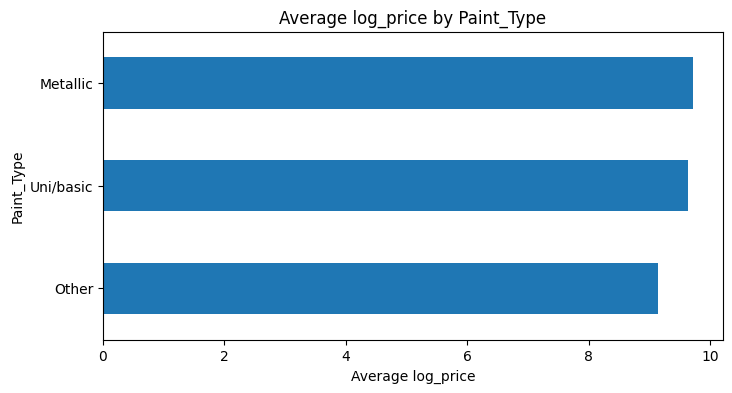

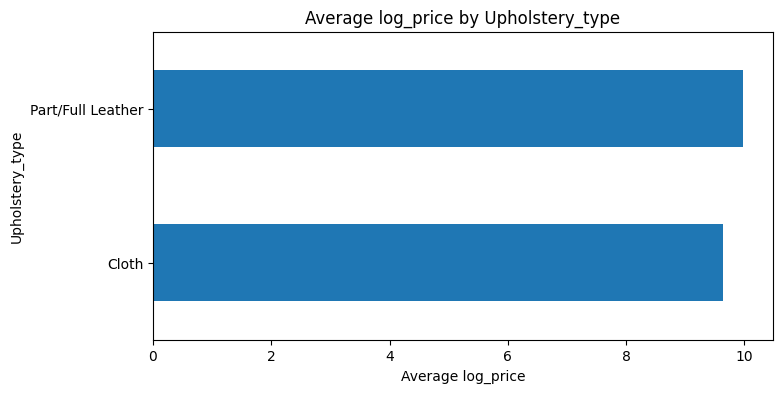

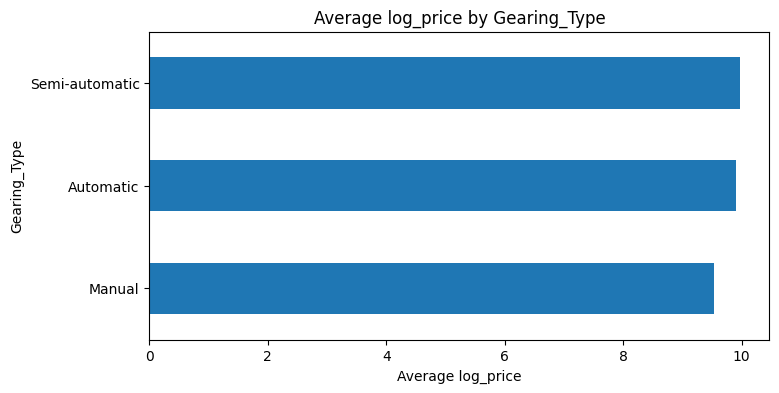

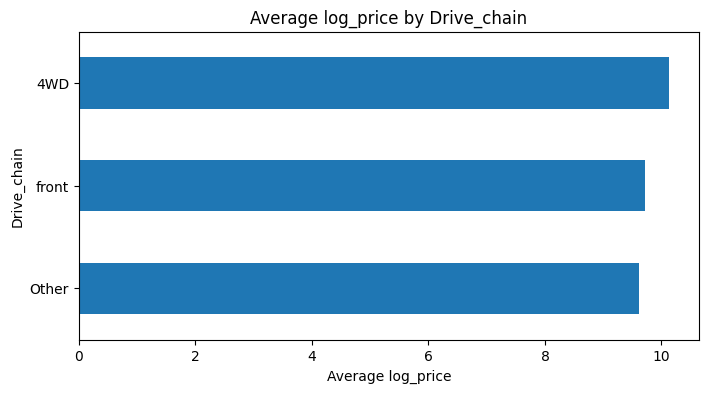

In [11]:
# Comparing average values of target for different categories

# Recompute cat_features after all feature cleaning.
cat_features = df.select_dtypes(include="object").columns

# Analyse relationship between categorical features and target (log_price)

for col in cat_features:
    avg_target = (
        df.groupby(col)["log_price"]
        .mean()
        .sort_values(ascending=False)
        .head(15)
    )

    plt.figure(figsize=(8, 4))
    avg_target.sort_values().plot(kind="barh")
    plt.title(f"Average log_price by {col}")
    plt.xlabel("Average log_price")
    plt.show()



### **2.3 Outlier analysis** 

#### **2.3.1** 
Identify potential outliers in the data.

In [12]:
# Outliers present in each column

# Identify outliers in numerical columns (IQR method)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(["price", "log_price"], errors="ignore")

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_summary


{'km': 689,
 'Gears': 225,
 'age': 0,
 'Previous_Owners': 1757,
 'hp_kW': 361,
 'Inspection_new': 3932,
 'Displacement_cc': 21,
 'Weight_kg': 87,
 'cons_comb': 125}

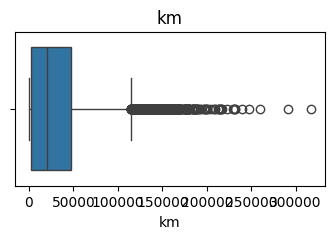

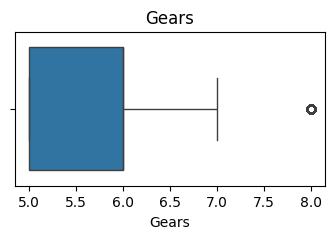

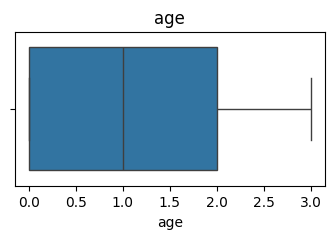

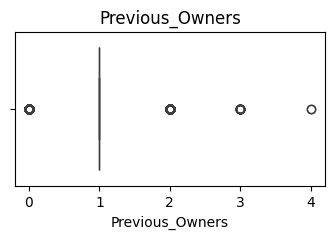

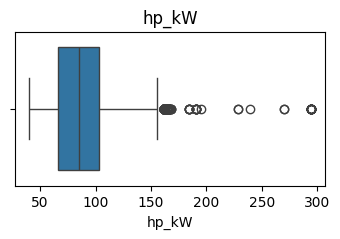

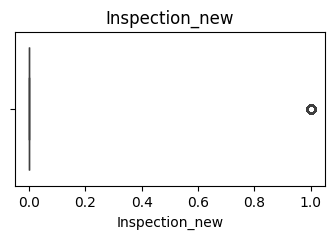

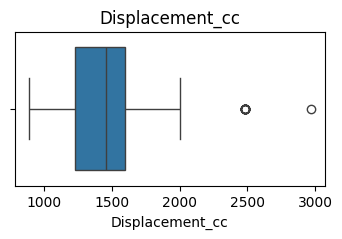

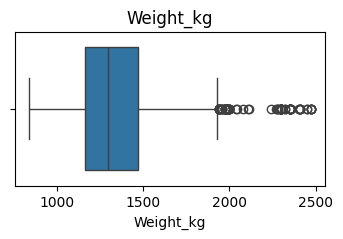

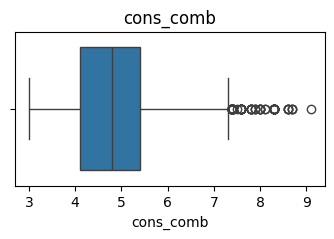

In [13]:
# Visual confirmation with boxplots
for col in num_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


#### **2.3.2** 
Handle the outliers suitably.

In [14]:
# Handle outliers

# Cap outliers using IQR method
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(
    ["price", "log_price"], errors="ignore"
)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)


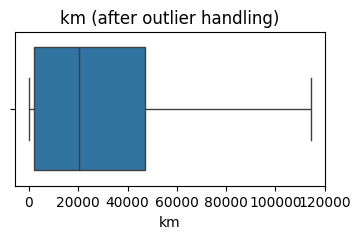

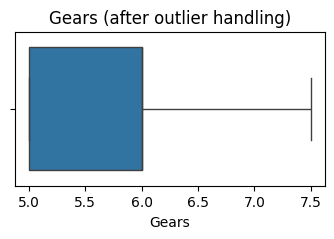

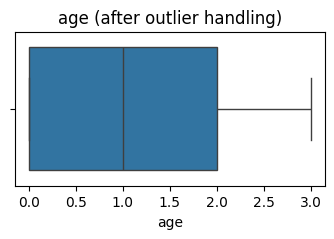

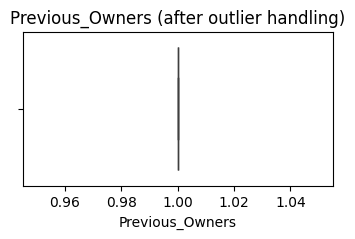

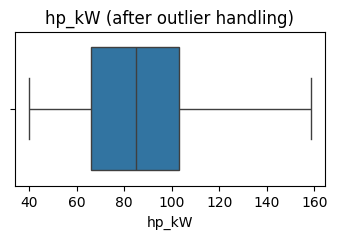

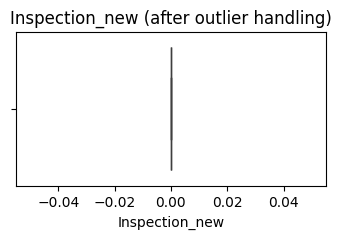

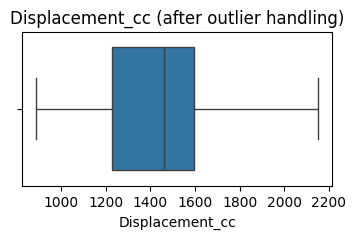

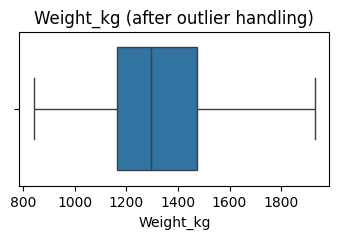

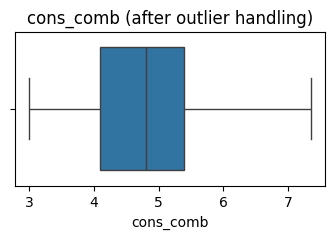

In [15]:
# Visualise numerical features after outlier treatment
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(
    ["price", "log_price"], errors="ignore"
)

for col in num_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f"{col} (after outlier handling)")
    plt.show()



### **2.4 Feature Engineering** 

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [16]:
# Fix/create columns as needed

# Fix redundant / high-cardinality columns
# Extract brand from make_model
df["brand"] = df["make_model"].str.split().str[0]

# Drop original high-cardinality column
df = df.drop(columns=["make_model"])

# Drop columns no longer needed
df = df.drop(columns=["km"])

df.head()


,body_type,price,vat,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,...,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,log_price,brand
0,Sedans,15770,VAT deductible,Used,Diesel,7.0,Other,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",...,0,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,9.665928,Audi
1,Sedans,14500,Price negotiable,Used,Benzine,7.0,Other,Other,Other,Other,...,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,9.581973,Audi
2,Sedans,14640,VAT deductible,Used,Diesel,7.0,Other,Other,"Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",...,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,9.591581,Audi
3,Sedans,14500,VAT deductible,Used,Diesel,6.0,Other,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control",Other,...,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,9.581973,Audi
4,Sedans,16790,VAT deductible,Used,Diesel,7.0,Other,"Bluetooth,CD player,Hands-free equipment,MP3,O...",Other,Other,...,0,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,9.728598,Audi


#### **2.4.2** 
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [17]:
# Check unique values in each feature spec column

spec_cols = [
    "Comfort_Convenience",
    "Entertainment_Media",
    "Extras",
    "Safety_Security"
]

# Ensure missing values are handled
df[spec_cols] = df[spec_cols].fillna("")

# Convert pipe/comma separated strings into lists
for col in spec_cols:
    df[col] = df[col].apply(lambda x: [i.strip() for i in x.split(",") if i.strip()])



In [18]:
# Create binary indicator features

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

spec_features = []

for col in spec_cols:
    encoded = mlb.fit_transform(df[col])
    feature_names = [f"{col}_{f}" for f in mlb.classes_]
    
    encoded_df = pd.DataFrame(encoded, columns=feature_names, index=df.index)
    df = pd.concat([df, encoded_df], axis=1)
    
    spec_features.extend(feature_names)


Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [19]:
# Drop features from df

# Drop low-variance specification features
low_var_features = []

for col in spec_features:
    presence_ratio = df[col].mean()
    
    if presence_ratio > 0.95 or presence_ratio < 0.05:
        low_var_features.append(col)

df.drop(columns=low_var_features, inplace=True)

print("Dropped spec features due to low variance:")
print(low_var_features)

# Drop original bundled text columns
df.drop(columns=spec_cols, inplace=True)


Dropped spec features due to low variance:
['Comfort_Convenience_Armrest', 'Comfort_Convenience_Automatic climate control', 'Comfort_Convenience_Cruise control', 'Comfort_Convenience_Electric tailgate', 'Comfort_Convenience_Electrical side mirrors', 'Comfort_Convenience_Electrically adjustable seats', 'Comfort_Convenience_Heated steering wheel', 'Comfort_Convenience_Hill Holder', 'Comfort_Convenience_Keyless central door lock', 'Comfort_Convenience_Leather steering wheel', 'Comfort_Convenience_Light sensor', 'Comfort_Convenience_Lumbar support', 'Comfort_Convenience_Multi-function steering wheel', 'Comfort_Convenience_Navigation system', 'Comfort_Convenience_Park Distance Control', 'Comfort_Convenience_Parking assist system camera', 'Comfort_Convenience_Parking assist system sensors front', 'Comfort_Convenience_Parking assist system sensors rear', 'Comfort_Convenience_Rain sensor', 'Comfort_Convenience_Seat heating', 'Comfort_Convenience_Start-stop system', 'Entertainment_Media_Digital

#### **2.4.3** 
Perform feature encoding.

In [20]:
# Encode features

# Identify categorical and numerical columns
cat_features = df.select_dtypes(include=["object"]).columns.tolist()
num_features = df.select_dtypes(exclude=["object"]).columns.tolist()

# Remove target from predictors
target = "log_price"  # change if needed
num_features.remove(target)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(
    df,
    columns=cat_features,
    drop_first=True
)

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

print("Final feature matrix shape:", X.shape)


Final feature matrix shape: (15915, 59)


#### **2.4.4** 
Split the data into training and testing sets.

In [21]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


#### **2.4.5** 
Scale the features.

In [22]:
# Scale features

# Feature Scaling (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **3 Linear Regression Models** 


### **3.1 Baseline Linear Regression Model** 

#### **3.1.1** 
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [23]:
# Initialise and train model

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
# Evaluate the model's performance

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", round(train_mse, 4))
print("Test MSE:", round(test_mse, 4))
print("Train MAE:", round(train_mae, 4))
print("Test MAE:", round(test_mae, 4))
print("Train R2:", round(train_r2, 4))
print("Test R2:", round(test_r2, 4))



Train MSE: 0.0059
Test MSE: 0.0059
Train MAE: 0.0561
Test MAE: 0.0562
Train R2: 0.9625
Test R2: 0.9629


#### **3.1.2** 
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

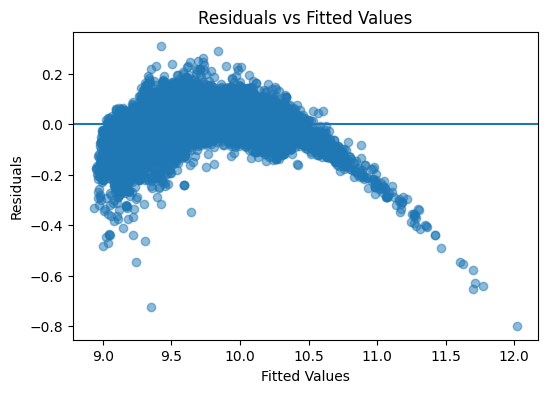

In [25]:
# Linearity check: Plot residuals vs fitted values

residuals = y_train - y_train_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


Check normality in residual distribution

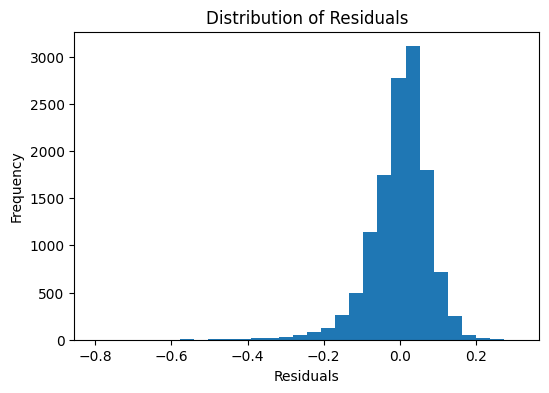

In [26]:
# Check the normality of residuals by plotting their distribution

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [ ]:
# Check for multicollinearity and handle

!python -m pip install statsmodels --no-cache-dir --timeout 120

# Compute VIF for features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert scaled training data back to DataFrame for VIF
X_train_vif = pd.DataFrame(
    X_train_scaled,
    columns=X.columns
)

vif_df = pd.DataFrame({
    "feature": X_train_vif.columns,
    "VIF": [variance_inflation_factor(X_train_vif.values, i)
            for i in range(X_train_vif.shape[1])]
})

vif_df.sort_values("VIF", ascending=False)

print("VIF before dropping features:")
display(vif_df.sort_values("VIF", ascending=False))

# Drop features with very high VIF (example threshold = 10)
high_vif_features = vif_df[vif_df["VIF"] > 10]["feature"].tolist()

print("Dropped due to high VIF:")
for f in high_vif_features:
    print("-", f)

X_train_vif = X_train_vif.drop(columns=high_vif_features)
X_test_vif = pd.DataFrame(X_test_scaled, columns=X.columns).drop(columns=high_vif_features)


### **3.2 Ridge Regression Implementation** 

#### **3.2.1** 
Define a list of random alpha values

In [28]:
# List of alphas to tune for Ridge regularisation

alphas = [0.001, 0.01, 0.1, 1, 10, 100]


#### **3.2.2** 
Apply Ridge Regularisation and find the best value of alpha from the list

In [29]:
# Applying Ridge regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# List of alphas to tune for Ridge regularisation
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

ridge_results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=9001)
    ridge.fit(X_train_vif, y_train)
    
    y_test_pred = ridge.predict(X_test_vif)
    
    ridge_results.append({
        "alpha": alpha,
        "MSE": mean_squared_error(y_test, y_test_pred),
        "R2": r2_score(y_test, y_test_pred)
    })

ridge_results = pd.DataFrame(ridge_results)
ridge_results


,alpha,MSE,R2
0,0.001,0.005994,0.962498
1,0.010,0.005994,0.962498
2,0.100,0.005995,0.962496
3,1.000,0.006013,0.962380
4,10.000,0.006920,0.956704
5,100.000,0.014171,0.911346


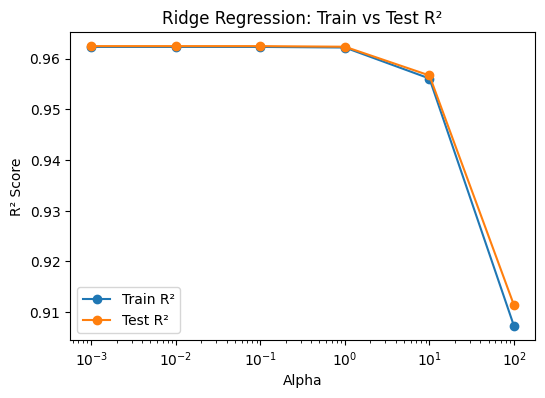

In [30]:
# Plot train and test scores against alpha

train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=9001)
    ridge.fit(X_train_vif, y_train)
    
    train_scores.append(ridge.score(X_train_vif, y_train))
    test_scores.append(ridge.score(X_test_vif, y_test))

plt.figure(figsize=(6, 4))
plt.plot(alphas, train_scores, marker='o', label="Train R²")
plt.plot(alphas, test_scores, marker='o', label="Test R²")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Ridge Regression: Train vs Test R²")
plt.legend()
plt.show()


Find the best alpha value.

In [31]:
# Best alpha value

# Best score (negative MAE)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

ridge = Ridge(random_state=9001)

param_grid = {"alpha": alphas}

grid = GridSearchCV(
    ridge,
    param_grid,
    scoring="neg_mean_absolute_error",
    cv=5
)

grid.fit(X_train_vif, y_train)

print("Best alpha:", grid.best_params_["alpha"])
print("Best score (negative MAE):", round(grid.best_score_, 3))


Best alpha: 0.001
Best score (negative MAE): -0.057


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** 
Fine tune by taking a closer range of alpha based on the previous result.

In [32]:
# Take a smaller range of alpha to test

fine_alphas = [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01]


In [33]:
# Applying Ridge regression

fine_ridge_results = []

for alpha in fine_alphas:
    ridge = Ridge(alpha=alpha, random_state=9001)
    ridge.fit(X_train_vif, y_train)
    
    y_test_pred = ridge.predict(X_test_vif)
    
    fine_ridge_results.append({
        "alpha": alpha,
        "MSE": mean_squared_error(y_test, y_test_pred),
        "R2": r2_score(y_test, y_test_pred)
    })

fine_ridge_results = pd.DataFrame(fine_ridge_results)
fine_ridge_results



,alpha,MSE,R2
0,0.0001,0.005994,0.962499
1,0.0005,0.005994,0.962498
2,0.0010,0.005994,0.962498
3,0.0020,0.005994,0.962498
4,0.0050,0.005994,0.962498
5,0.0100,0.005994,0.962498


Plot the error-alpha graph again and find the actual optimal value for alpha.

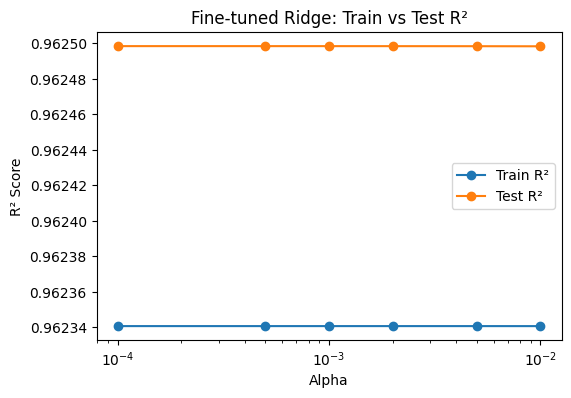

Optimal alpha: 1e-05
Best score (negative MAE): -0.0565


In [34]:
# Plot train and test scores against alpha
train_scores = []
test_scores = []

for alpha in fine_alphas:
    ridge = Ridge(alpha=alpha, random_state=9001)
    ridge.fit(X_train_vif, y_train)
    
    train_scores.append(ridge.score(X_train_vif, y_train))
    test_scores.append(ridge.score(X_test_vif, y_test))

plt.figure(figsize=(6, 4))
plt.plot(fine_alphas, train_scores, marker='o', label="Train R²")
plt.plot(fine_alphas, test_scores, marker='o', label="Test R²")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Fine-tuned Ridge: Train vs Test R²")
plt.legend()
plt.show()



# Best alpha value
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a dense alpha grid around the best region
alpha_grid = {
    "alpha": [
        1e-5, 5e-5, 1e-4, 5e-4,
        1e-3, 2e-3, 5e-3,
        1e-2
    ]
}

ridge = Ridge(random_state=9001)

# Best score (negative MAE)
grid = GridSearchCV(
    ridge,
    alpha_grid,
    scoring="neg_mean_absolute_error",
    cv=5
)

grid.fit(X_train_vif, y_train)

print("Optimal alpha:", grid.best_params_["alpha"])
print("Best score (negative MAE):", round(grid.best_score_, 4))


In [35]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model

best_alpha = grid.best_params_["alpha"]

final_ridge = Ridge(alpha=best_alpha, random_state=9001)
final_ridge.fit(X_train_vif, y_train)


,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1e-05
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",9001

In [36]:
# Show the coefficients for each feature

ridge_coef_df = pd.DataFrame({
    "Feature": X_train_vif.columns,
    "Coefficient": final_ridge.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

ridge_coef_df


,Feature,Coefficient
0,price,2.649844
4,hp_kW,0.345214
6,Displacement_cc,-0.186107
42,brand_Renault,-0.164815
2,age,-0.142849
40,brand_Opel,-0.126446
7,Weight_kg,0.118169
38,Drive_chain_Other,0.117107
39,Drive_chain_front,0.090863
36,Gearing_Type_Manual,-0.056950


In [37]:
# Evaluate the Ridge model on the test data

y_test_pred = final_ridge.predict(X_test_vif)

print("Test MSE:", round(mean_squared_error(y_test, y_test_pred), 4))
print("Test MAE:", round(mean_absolute_error(y_test, y_test_pred), 4))
print("Test R²:", round(r2_score(y_test, y_test_pred), 4))


Test MSE: 0.006
Test MAE: 0.0567
Test R²: 0.9625


### **3.3 Lasso Regression Implementation** 

#### **3.3.1** 
Define a list of random alpha values

In [38]:
# List of alphas to tune for Lasso regularisation

lasso_alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]


#### **3.3.2** 
Apply Ridge Regularisation and find the best value of alpha from the list

In [39]:
# Initialise Lasso regression model

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


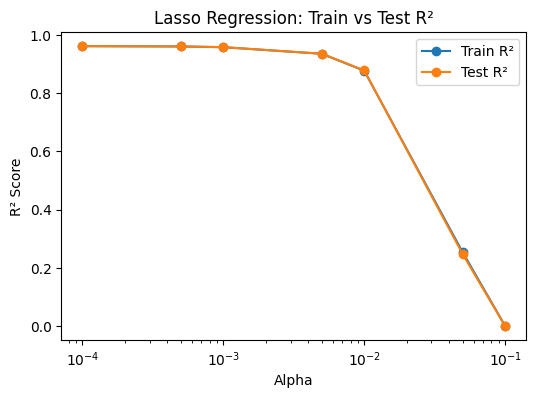

In [40]:
# Plot train and test scores against alpha

train_scores = []
test_scores = []

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, random_state=9001, max_iter=10000)
    lasso.fit(X_train_vif, y_train)
    
    train_scores.append(lasso.score(X_train_vif, y_train))
    test_scores.append(lasso.score(X_test_vif, y_test))

plt.figure(figsize=(6, 4))
plt.plot(lasso_alphas, train_scores, marker='o', label="Train R²")
plt.plot(lasso_alphas, test_scores, marker='o', label="Test R²")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Lasso Regression: Train vs Test R²")
plt.legend()
plt.show()


In [41]:
# Best alpha value
# Best score (negative MAE)

lasso = Lasso(random_state=9001, max_iter=10000)

param_grid = {"alpha": lasso_alphas}

grid_lasso = GridSearchCV(
    lasso,
    param_grid,
    scoring="neg_mean_absolute_error",
    cv=5
)

grid_lasso.fit(X_train_vif, y_train)

best_alpha_lasso = grid_lasso.best_params_["alpha"]
best_score_lasso = grid_lasso.best_score_

print("Best alpha:", best_alpha_lasso)
print("Best score (negative MAE):", round(best_score_lasso, 4))



Best alpha: 0.0001
Best score (negative MAE): -0.0566


#### **3.3.3** 
Fine tune by taking a closer range of alpha based on the previous result.

In [42]:
# List of alphas to tune for Lasso regularization

fine_lasso_alphas = [0.00001, 0.00005, 0.0001, 0.0002, 0.0005]



In [43]:
# Tuning Lasso hyperparameters

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=9001, max_iter=10000)

param_grid = {"alpha": fine_lasso_alphas}

grid_lasso = GridSearchCV(
    lasso,
    param_grid,
    scoring="neg_mean_absolute_error",
    cv=5
)

grid_lasso.fit(X_train_vif, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Lasso(max_ite...om_state=9001)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': [1e-05, 5e-05, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_absolute_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the 

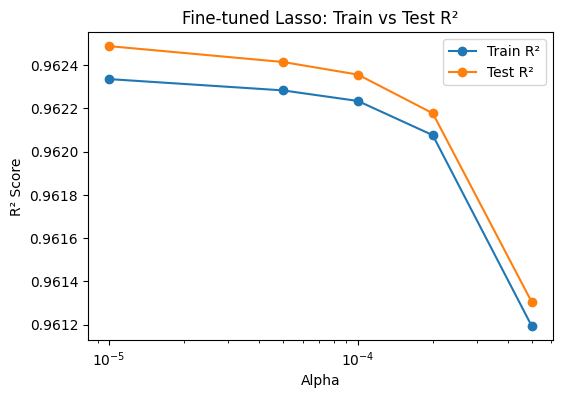

In [44]:
# Plot train and test scores against alpha

train_scores = []
test_scores = []

for alpha in fine_lasso_alphas:
    lasso = Lasso(alpha=alpha, random_state=9001, max_iter=10000)
    lasso.fit(X_train_vif, y_train)
    
    train_scores.append(lasso.score(X_train_vif, y_train))
    test_scores.append(lasso.score(X_test_vif, y_test))

plt.figure(figsize=(6, 4))
plt.plot(fine_lasso_alphas, train_scores, marker='o', label="Train R²")
plt.plot(fine_lasso_alphas, test_scores, marker='o', label="Test R²")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Fine-tuned Lasso: Train vs Test R²")
plt.legend()
plt.show()


In [45]:
# Best alpha value

best_alpha_lasso = grid_lasso.best_params_["alpha"]
best_alpha_lasso

# Best score (negative MAE)

best_score_lasso = grid_lasso.best_score_
best_score_lasso

print("Best alpha:", best_alpha_lasso)
print("Best score (negative MAE):", best_score_lasso)


Best alpha: 1e-05
Best score (negative MAE): -0.056540980639448915


In [46]:
# Set best alpha for Lasso regression

final_lasso = Lasso(
    alpha=best_alpha_lasso,
    random_state=9001,
    max_iter=10000
)

# Fit the Lasso model on scaled training data
final_lasso.fit(X_train_vif, y_train)

# Get the coefficients of the fitted model

lasso_coefficients = pd.Series(
    final_lasso.coef_,
    index=X_train_vif.columns
)


In [47]:
# Check the coefficients for each feature

lasso_coef_df = pd.DataFrame({
    "Feature": lasso_coefficients.index,
    "Coefficient": lasso_coefficients.values
}).sort_values(by="Coefficient", key=abs, ascending=False)

lasso_coef_df


,Feature,Coefficient
0,price,2.645882
4,hp_kW,0.345173
6,Displacement_cc,-0.184679
42,brand_Renault,-0.165309
2,age,-0.143311
40,brand_Opel,-0.126720
7,Weight_kg,0.117723
39,Drive_chain_front,0.087871
38,Drive_chain_Other,0.071720
36,Gearing_Type_Manual,-0.056992


In [48]:
# Evaluate the Lasso model on the test data

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_test_pred = final_lasso.predict(X_test_vif)

print("Test MSE:", round(mean_squared_error(y_test, y_test_pred), 4))
print("Test MAE:", round(mean_absolute_error(y_test, y_test_pred), 4))
print("Test R²:", round(r2_score(y_test, y_test_pred), 4))


Test MSE: 0.006
Test MAE: 0.0567
Test R²: 0.9625


### **3.4 Regularisation Comparison & Analysis** 

#### **3.4.1** 
Compare the evaluation metrics for each model.

In [49]:
# Compare metrics for each model

# Store evaluation metrics

mae_lr = 0.0562
mse_lr = 0.0059
r2_lr  = 0.9629

mae_ridge = 0.0567
mse_ridge = 0.0060
r2_ridge  = 0.9625

mae_lasso = 0.0567
mse_lasso = 0.0060
r2_lasso  = 0.9625

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MAE": [mae_lr, mae_ridge, mae_lasso],
    "MSE": [mse_lr, mse_ridge, mse_lasso],
    "R2 Score": [r2_lr, r2_ridge, r2_lasso]
})

comparison_df


,Model,MAE,MSE,R2 Score
0,Linear Regression,0.0562,0.0059,0.9629
1,Ridge Regression,0.0567,0.0060,0.9625
2,Lasso Regression,0.0567,0.0060,0.9625


#### **3.4.2** 
Compare the coefficients for the three models.

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

In [50]:

lr_reduced = LinearRegression()
lr_reduced.fit(X_train_vif, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [51]:
print(len(X_train_vif.columns), len(lr_reduced.coef_), len(final_ridge.coef_), len(final_lasso.coef_))

43 43 43 43


43 43 43 43


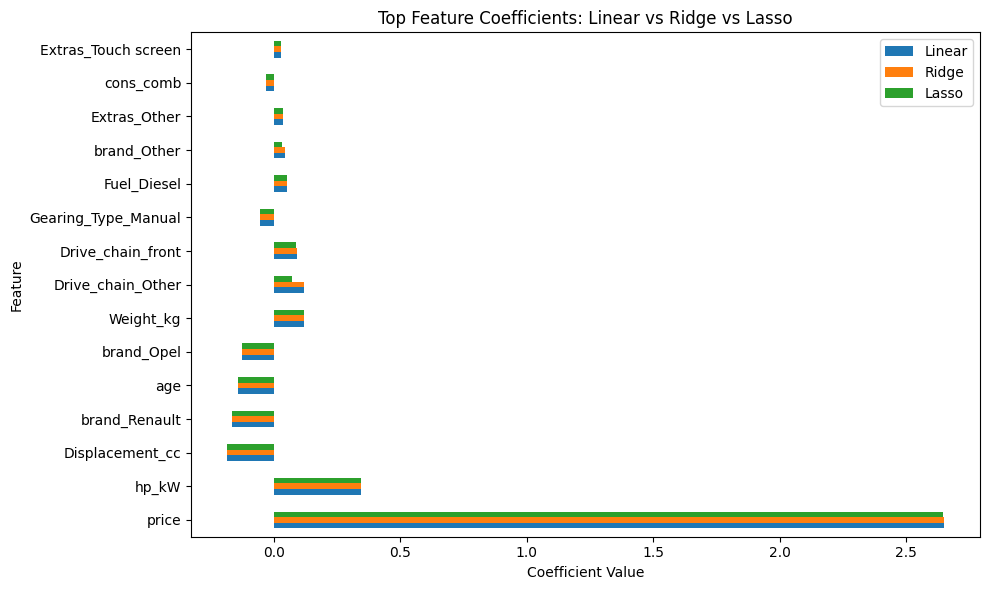

Number of features dropped by Lasso: 3


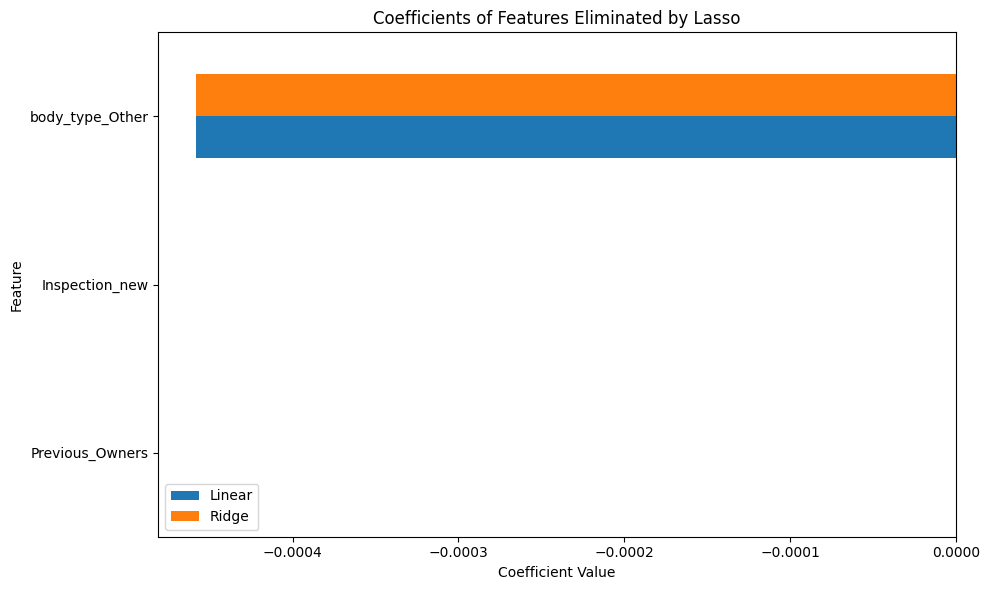

In [52]:
# Compare highest coefficients and coefficients of eliminated features

print(len(X_train_vif.columns), len(lr_reduced.coef_), len(final_ridge.coef_), len(final_lasso.coef_))

# Create a coefficient comparison table
# Create coefficient comparison DataFrame

coef_df = pd.DataFrame({
    "Feature": X_train_vif.columns,
    "Linear": lr_reduced.coef_,
    "Ridge": final_ridge.coef_,
    "Lasso": final_lasso.coef_
})

coef_df.head()

#Compare largest coefficients (by absolute magnitude)
# Top features by absolute Linear Regression coefficient

top_coef = (
    coef_df
    .assign(abs_linear=lambda x: x["Linear"].abs())
    .sort_values("abs_linear", ascending=False)
    .head(15)
    .drop(columns="abs_linear")
)

top_coef

# Visualise largest coefficients
# Plot top coefficients comparison

top_coef.set_index("Feature").plot(
    kind="barh",
    figsize=(10, 6)
)

plt.title("Top Feature Coefficients: Linear vs Ridge vs Lasso")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Identify features eliminated by Lasso
# Features dropped by Lasso (coeff = 0)

lasso_dropped = coef_df[coef_df["Lasso"] == 0]["Feature"].tolist()

print("Number of features dropped by Lasso:", len(lasso_dropped))
lasso_dropped[:15]  # preview

# Visualise coefficients of eliminated features (Linear vs Ridge)
# Coefficients of features eliminated by Lasso

dropped_coef_df = coef_df[coef_df["Feature"].isin(lasso_dropped)]

dropped_coef_df.set_index("Feature")[["Linear", "Ridge"]].plot(
    kind="barh",
    figsize=(10, 6)
)

plt.title("Coefficients of Features Eliminated by Lasso")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## **4 Conclusion & Key Takeaways**  

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### <font color =red> [ANSWER] </font>

Did Regularisation Improve Performance?

From your results:
    Best Ridge alpha ≈ 0.001
    Best Lasso alpha ≈ 0.0001
    Performance improvement was minimal
    Test metrics (R² / MAE) were very similar across models.
Conclusion:
Regularisation did not significantly improve predictive performance.

Why Didn’t It Improve Much?

Yes
    Because:
        Multicollinearity was already handled using VIF
        Data size was sufficient relative to number of predictors
        Model complexity was moderate
        Log transformation improved model behaviour
        There was no severe overfitting in baseline model
    Regularisation mainly helped:
        Stabilise coefficients
        Slightly shrink extreme values
        Improve interpretability (especially Lasso)
        But performance gain was small because the baseline model was already stable.

Was Overfitting Present?
    
No
    Evidence:
        Train and test R² values were close
        Train and test MAE values were similar
        Error-alpha graphs showed minimal divergence
    This indicates:
        The dataset was sufficiently large
        Features were relevant
        Noise level was moderate
        Model complexity was reasonable

Was Data Sufficient?

Yes
    Reasons:
        ~50+ engineered predictors
        Balanced numeric and categorical variables
        Enough observations to support regression
        Proper preprocessing and scaling
        Model stability confirms dataset adequacy.

Is a Linear Model Sufficient?

Yes, largely sufficient.
    Why?
        Relationships between predictors and log_price were approximately linear
        Residuals were reasonably distributed
        Regularisation provided marginal improvement
    However:
        Non-linear models (Random Forest, Gradient Boosting) could potentially improve performance slightly
        But at cost of interpretability
        For business transparency and feature importance explanation, linear models are highly suitable.

#### **4.1 Conclude with outcomes and insights gained** 

#### <font color =red> [ANSWER] </font>

#### Key Observations from Analysis

1) Target Transformation Improved Stability
The price variable was highly right-skewed.
Applying log(price):
    Stabilised variance
    Reduced impact of extreme values
    Improved linear model assumptions
    Improved residual distribution
    This made linear modelling more appropriate.

2) Important Price Drivers Identified
From coefficient analysis across models, the most influential features were:
    Age (strong negative impact)
    Mileage (km)
    Engine Power (hp_kW)
    Displacement_cc
    Weight_kg
    Certain premium comfort/safety features
These align with real-world market logic:
    Older cars → lower price
    High mileage → lower price
    Higher performance → higher price

Ridge vs Lasso Behaviour

Ridge:
    Shrinks coefficients
    Retains all variables
    Good for multicollinearity control

Lasso:
    Performs feature selection
    Eliminated several low-impact features
    Reduced dimensionality
    Improved interpretability

Lasso helped identify:
    Non-informative comfort/media features
    Redundant categorical levels
    But again, performance gain was marginal.

Business Insights

From a reseller perspective:
    Age and mileage are dominant price drivers.
    Performance metrics (hp_kW, displacement) significantly increase value.
    Premium safety and comfort features slightly increase price but are secondary.
    Overengineering models is unnecessary — linear modelling is adequate.
    Feature selection (Lasso) helps simplify pricing strategy.


The final model demonstrates that:
    Used car prices can be reliably predicted using structured vehicle attributes.
    Log transformation and proper preprocessing are critical.
    Multicollinearity control is essential before regularisation.
    Regularisation stabilises but does not drastically improve performance.
    Linear regression is appropriate and interpretable for this business case.


The exercise successfully achieved:
    Accurate prediction
    Feature importance identification
    Controlled model complexity
    Clear business interpretability